In [1]:
from skimage import data
from skimage.color import rgb2gray
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#data.astronaut
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)

In [3]:
print(astronaut.shape)
print(gray_astronaut.shape)

(512, 512, 3)
(512, 512)


In [4]:
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img, cmap = plt.cm.gray)
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

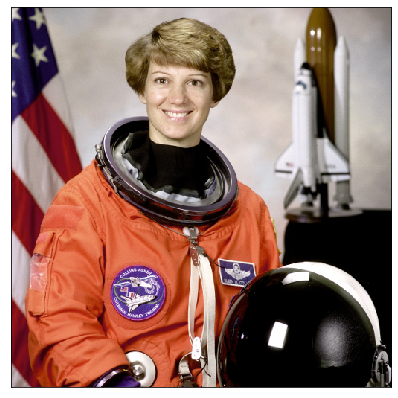

In [5]:
imshow(astronaut)

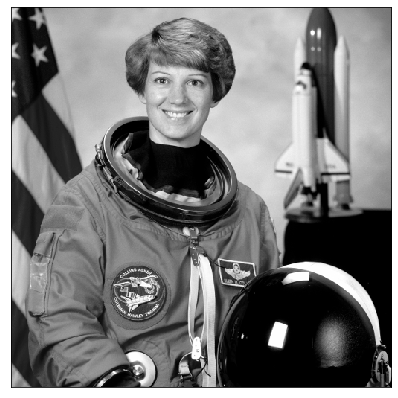

In [6]:
imshow(gray_astronaut)

In [7]:
#Create Salt&Pepper noise
def sp_noise(image, prob):
    #Add salt & pepper noise to image
    #Prob: probability of the noise
    output = np.zeros(image.shape, np.uint8)
    rnd = np.random.rand(image.shape[0], image.shape[1])
    output = image.copy()
    output[rnd < prob] = 0
    output[rnd > 1 - prob] = 1
    return output

In [8]:
noise_astronaut = sp_noise(gray_astronaut, 0.015)

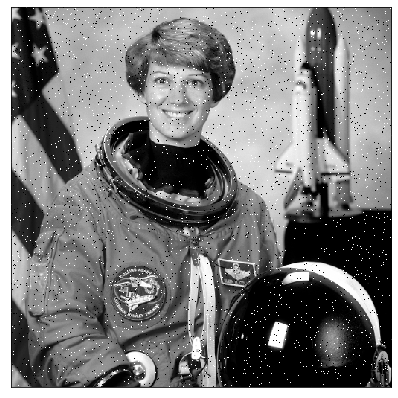

In [9]:
imshow(noise_astronaut)

In [10]:
#Filtro de medianas
#Implementación del pseudocódigo disponible en wikipedia
def filtro_mediana(img, k):
    import math
    output = np.zeros(img.shape)
    edge_x = math.floor(k/2)
    edge_y = edge_x
    
    kernel = np.zeros(k*k)
    
    for x in range(edge_x, img.shape[0]-1):
        for y in range(edge_y, img.shape[1]-1):
            i = 0
            for fx in range(0, k):
                for fy in range(0, k):
                    try:
                        kernel[i] = img[x + fx - edge_x, y + fy - edge_y]
                    except:
                        kernel[i] = 0
                    i = i + 1
            kernel = np.sort(kernel)
            output[x, y] = kernel[k]
            
    return output

In [11]:
filtered_astronaut = filtro_mediana(noise_astronaut, 3)

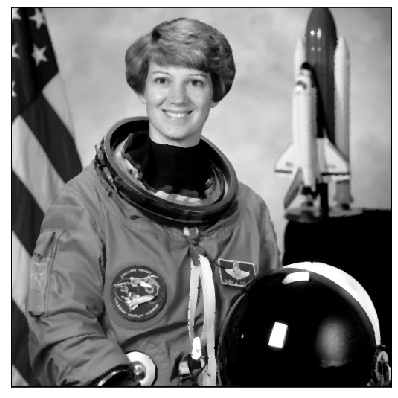

In [12]:
imshow(filtered_astronaut)

In [13]:
#Filtro Sobel
def operador_sobel(img):
    A=np.array([[1],[2],[1]])
    B=np.array([[-1], [0], [1]])
    #Núcleos de convolución
    Gx = signal.convolve(A * (B.T), img)
    Gy = signal.convolve(B * (A.T), img)
    #Módulo de convoluciones
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

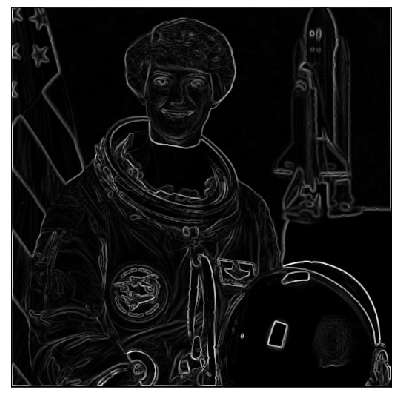

In [14]:
Sob = operador_sobel(filtered_astronaut)
imshow(Sob)

In [15]:
filtered_astronaut = filtro_mediana(noise_astronaut, 5)

In [16]:
bordes = gray_astronaut - filtered_astronaut

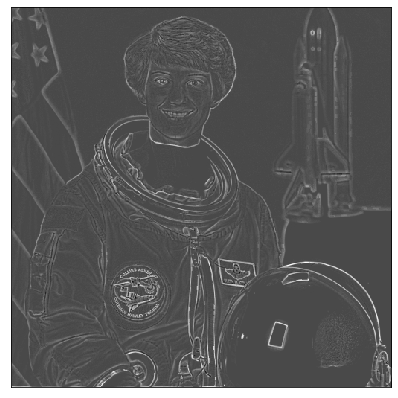

In [17]:
imshow(bordes)